ike demands


# Bike Sharing Case Study
### - Using Multiple Linear Regression

#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes needs business plan to be able to accelerate its revenue. They want to prepare themselves to cater to the people's needs by standing out from other service providers and make huge profits.


We need to understand the factors on which the demand for these shared bikes depends. Specifically, the factors affecting the demand for these shared bikes in the American market

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

In [319]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [320]:
import numpy as np
import pandas as pd

In [344]:
bikeData = pd.read_csv("day.csv")

In [345]:
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [346]:
bikeData.shape

(730, 16)

In [347]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [348]:
bikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Visualising the Data

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Data clean-up/mapping


In [350]:
# For ease of understanding, let us put string values to categorical data with numbers

bikeData['weekday'] = bikeData['weekday'].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})
bikeData['weathersit'] = bikeData['weathersit'].map({1:'clear', 2:'cloudy', 3:'LightRain'})
bikeData['season'] = bikeData['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikeData['mnth'] = bikeData['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

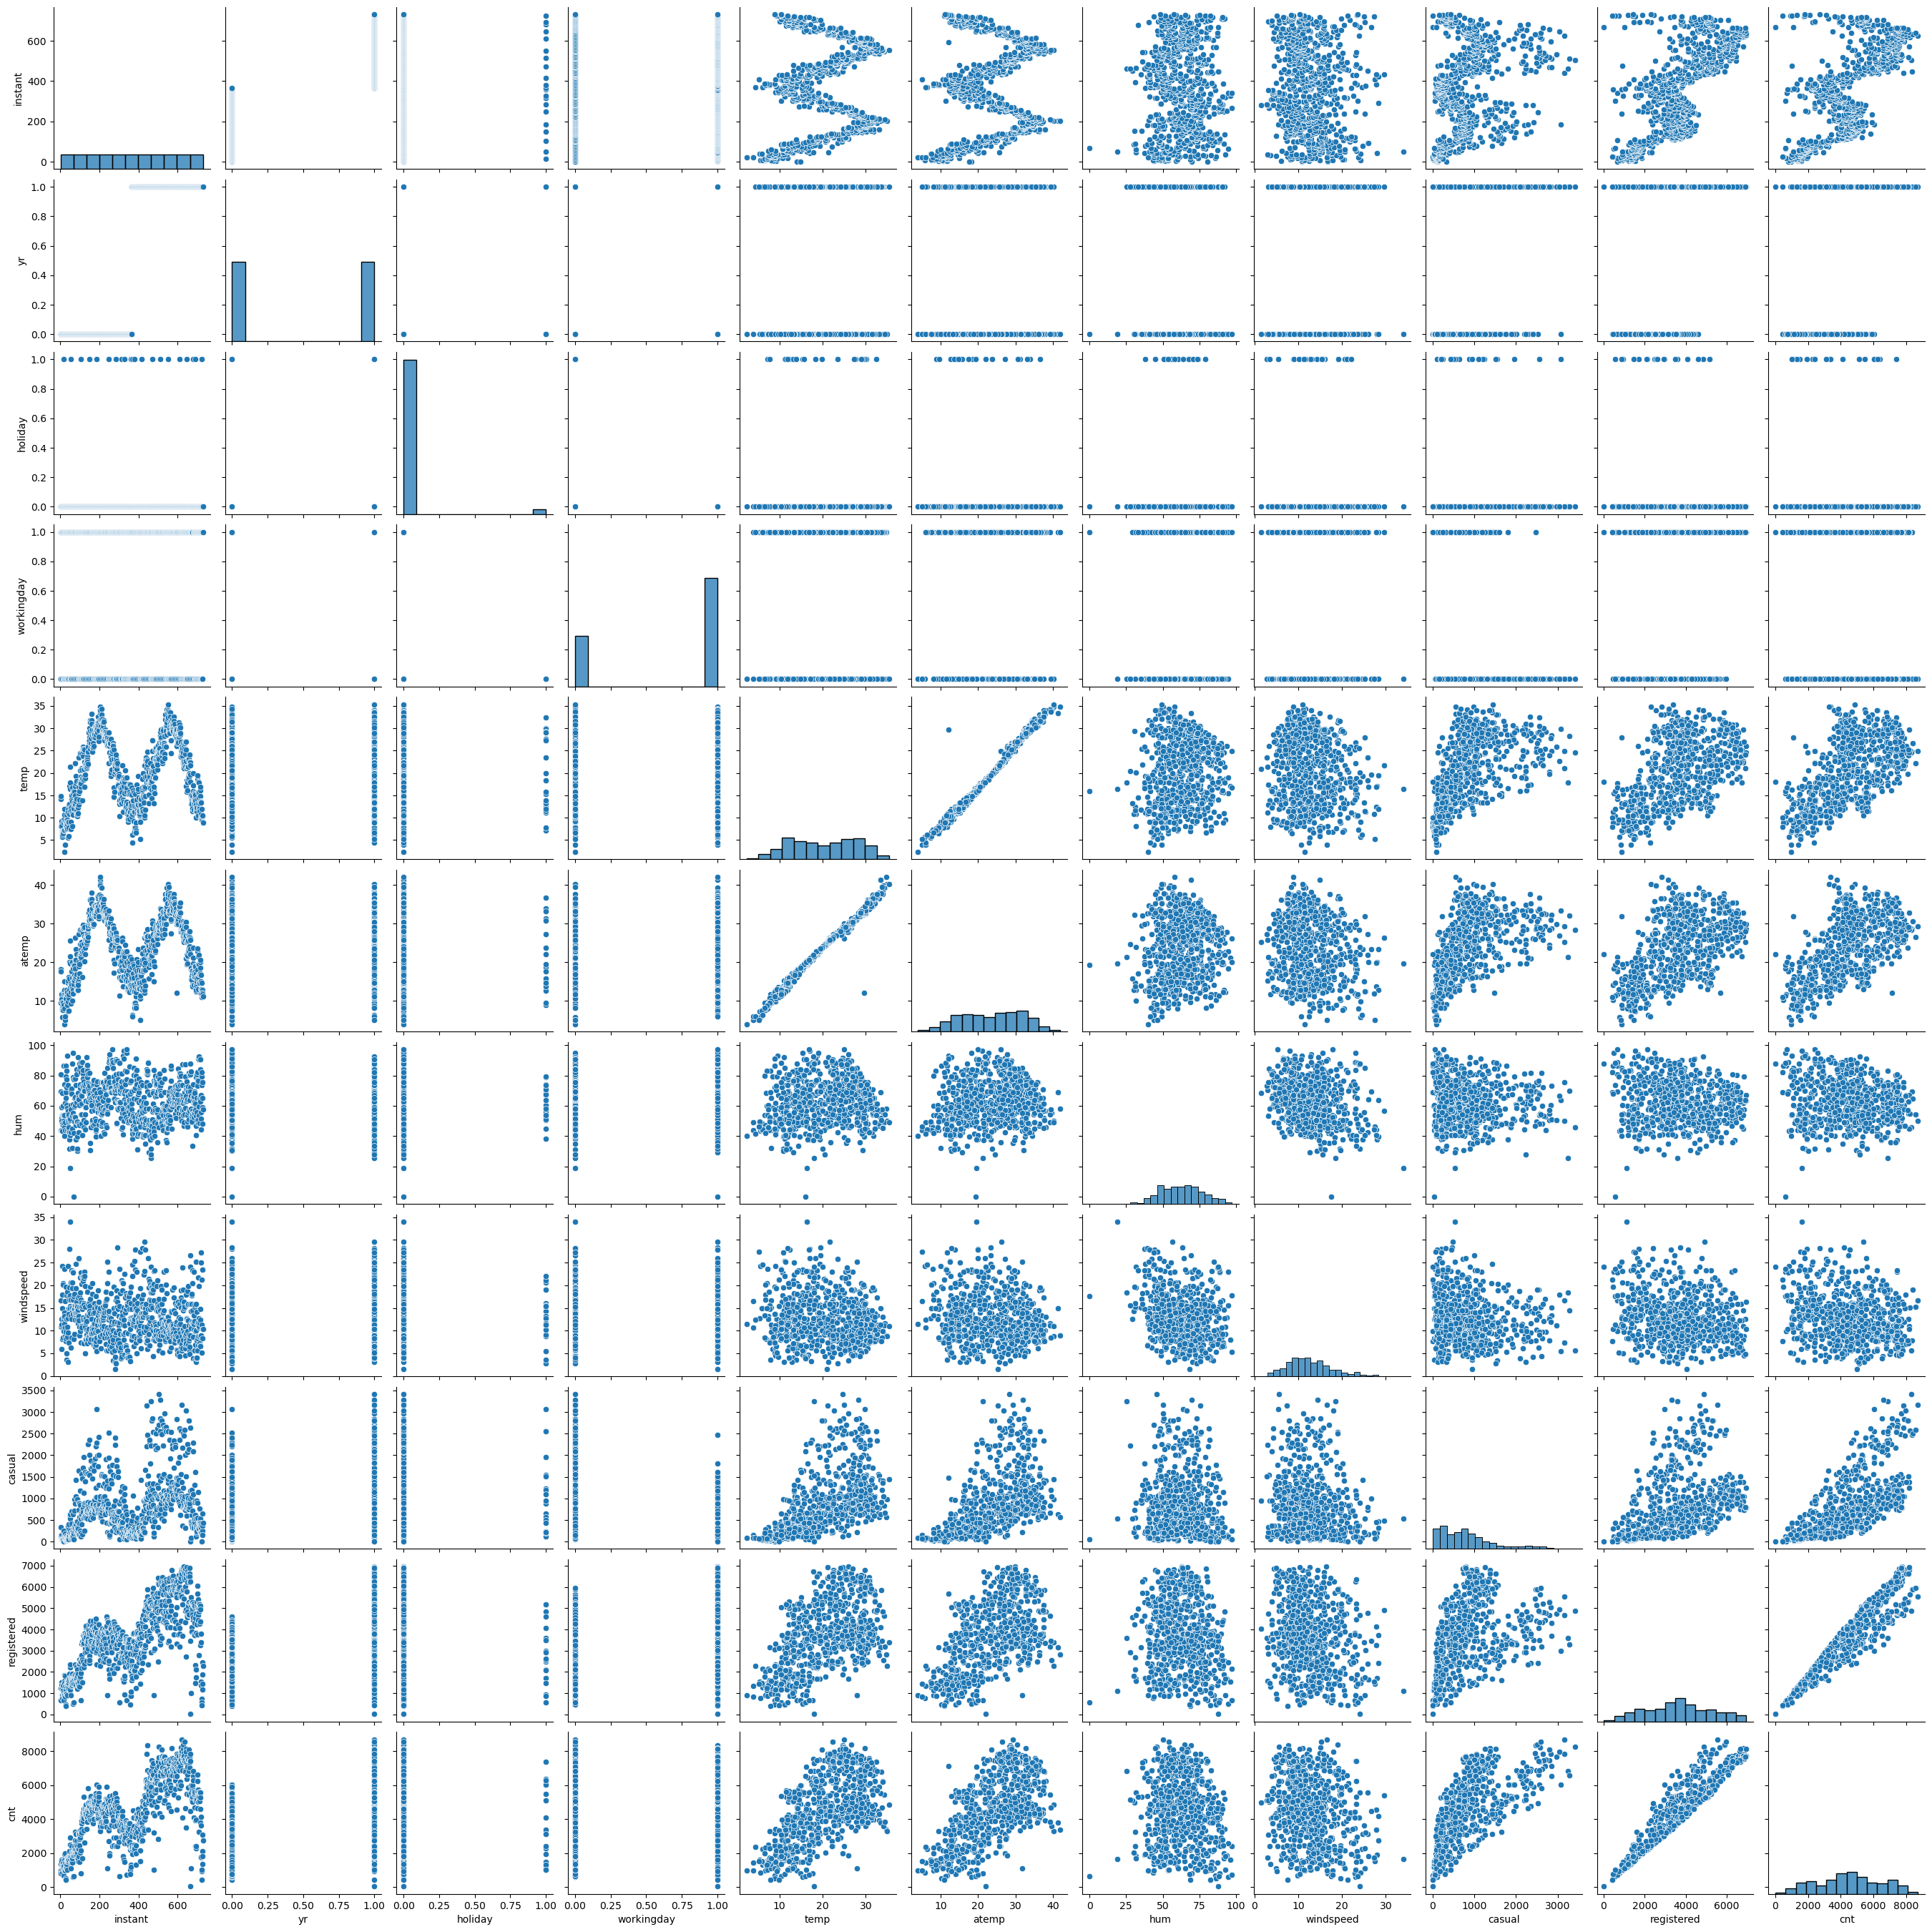

In [351]:
sns.pairplot(bikeData)
plt.show()

### Inferences from pair plot

- temp and atemp seem to very linear and highly corelated. Let us drop temp and use atemp.
- atemp seems to have positive linear correlation to cnt
- holiday - Very less used during holiday
- humidity - bikes are used most when humidity is between 40-80. Almost nigligible when under 25
- weathersit - Most used when weather is clear or partly cloudy. Very less used with it is light snow/rain. Never used during heavy rain/snow/thunderstorm.
- cnt - should be our the target variable. Business requirement is to maximize variable.
- month + atemp - high usage during mid months (Highest in july), during these months  temperatures are high.
- season + atemp: Obvious relation


### Visualising Categorical Variables

Categorical variables we have:
- season (1:spring, 2:summer, 3:fall, 4:winter)
- yr (0: 2018, 1:2019)
- mnth (1 to 12)
- holiday (1:holiday, 0: Otherwise)
- weekday 
- workingday (1: if day is neither weekend nor holiday, 0: otherwise)
- weathersit (1: Clear, 2: Mist + Cloudy, 3: Light Snow/Rain, 4: Heavy Rain/Snow)og


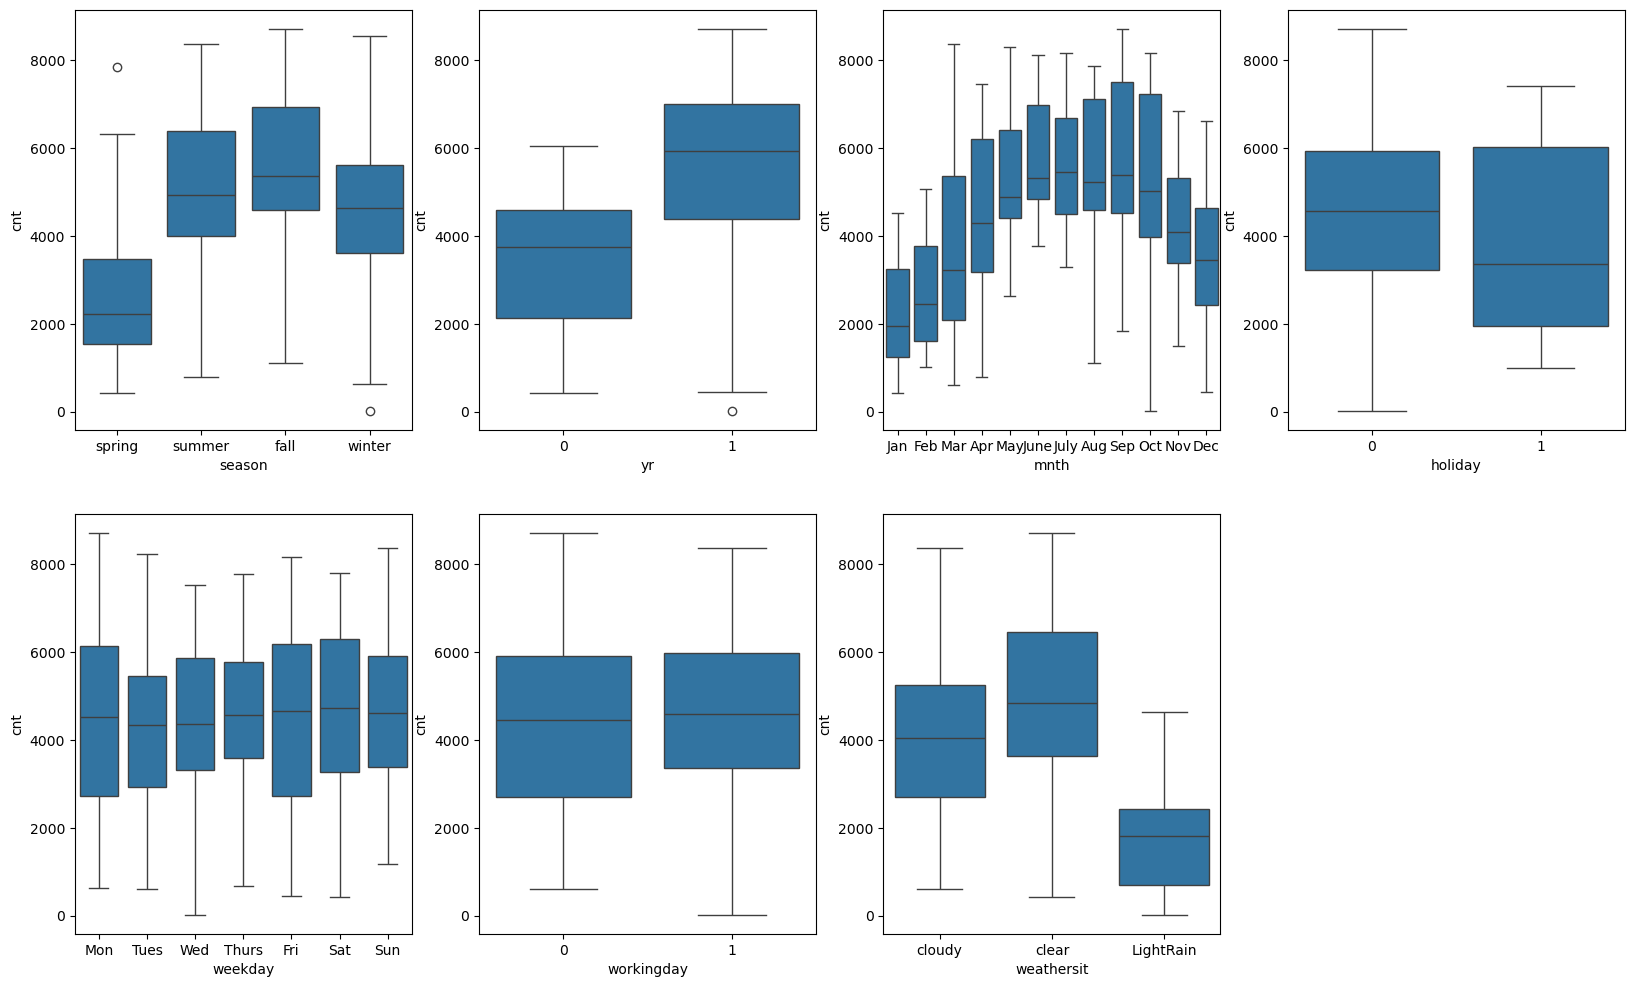

In [352]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeData)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeData)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeData)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeData)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeData)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeData)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeData)
plt.show()

#### Inferences
- season: most usage during summar and fall
- yr: 2019 has seen much better bike usage compared to 2018
- weathersit: higher usage when weather is good
  

#### We can also visualise some of these categorical features parallely by using the hue argument.

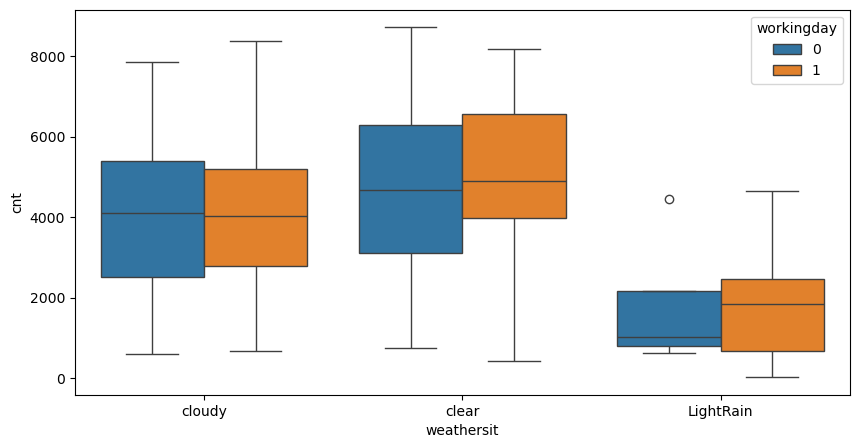

In [353]:
# Plot for season with working as the hue.
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'workingday', data = bikeData)
plt.show()

#### Inferences
- Less usage in light snow/rains
- On rainy/snowy holiday most people prefer to stay at home

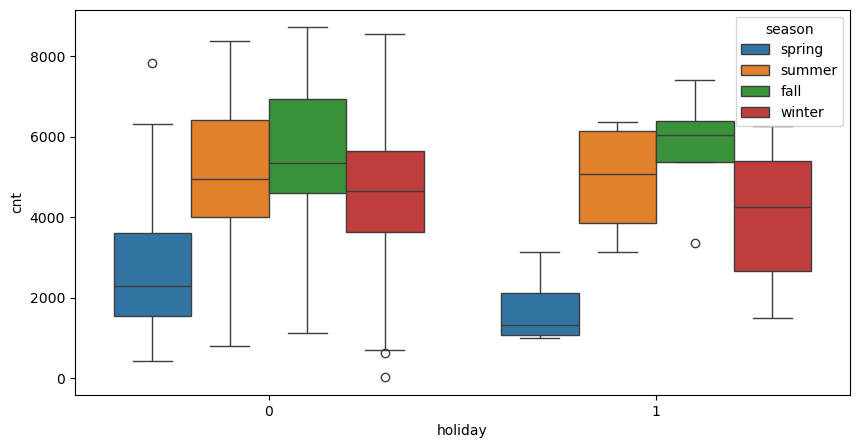

In [354]:
# Plot for holiday with season as the hue.
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'season', data = bikeData)
plt.show()

#### Inferences
- Less usage during Spring holiday, may be they are out of town.
  

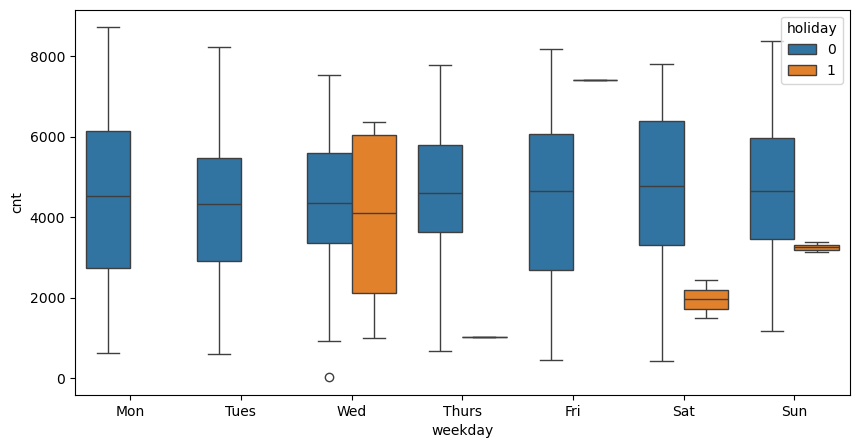

In [355]:
# Plot for weekday with holiday as the hue.
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'holiday', data = bikeData)
plt.show()

#### Inferences
- Many holidays are on Wednesday.
  

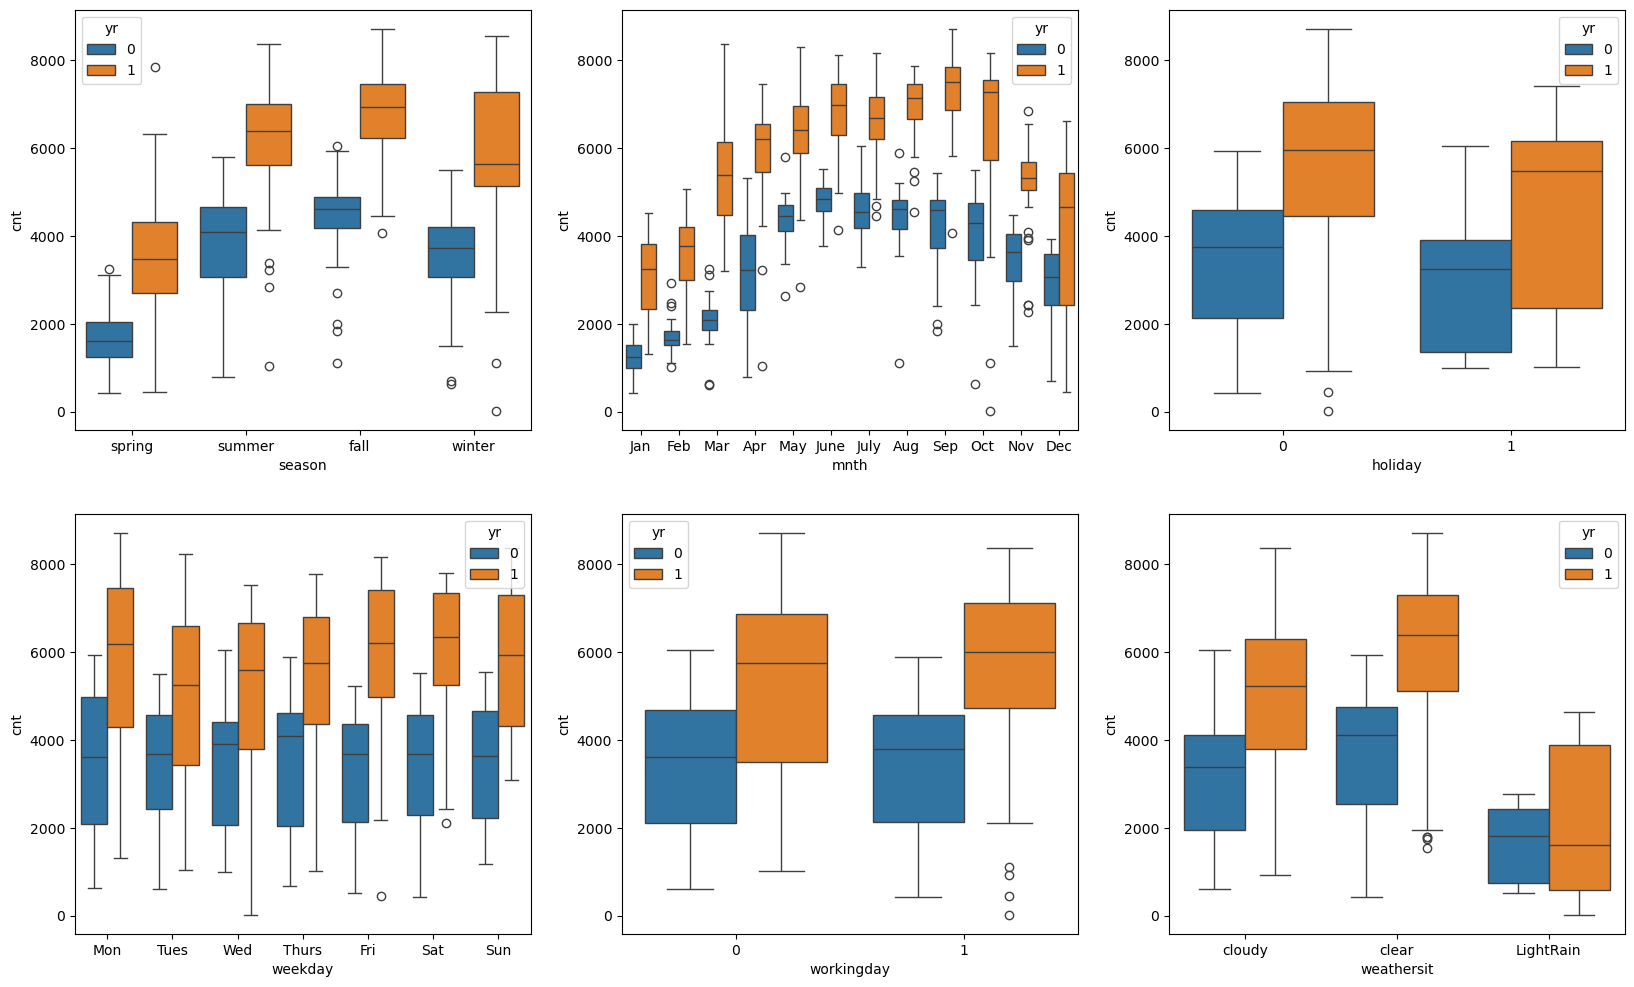

In [356]:
# Let us check company performance on various params in 2019 vs 2018
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', hue='yr', data = bikeData)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', hue='yr', data = bikeData)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', hue='yr', data = bikeData)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', hue='yr', data = bikeData)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', hue='yr', data = bikeData)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', hue='yr', data = bikeData)
plt.show()

#### Inferences
- Company has performed consistently across all areas in 2019, compared to 2018
- Slight dip in median during light snow/rains

# Step 3: Data Preparation

In [357]:
#Let us drop variables

#atemp can be used instead of temp
#bikeData = bikeData.drop('temp', axis=1)
bikeData = bikeData.drop('casual', axis=1)
bikeData = bikeData.drop('registered', axis=1)

In [358]:
#instant can cover for dteday
bikeData = bikeData.drop('dteday', axis=1)

In [359]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


## Create Dummy Variables

In [360]:
# Get the dummy variables for 'season' and store it in a new variable - 'seasonValue'
seasonValue = pd.get_dummies(bikeData['season'], drop_first = True)
seasonValue.head()

,spring,summer,winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [361]:
bikeData = pd.concat([bikeData, seasonValue], axis = 1)

In [362]:
bikeData.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,spring,0,Jan,0,Mon,0,cloudy,14.110847,18.18125,80.5833,10.749882,985,True,False,False
1,2,spring,0,Jan,0,Tues,0,cloudy,14.902598,17.68695,69.6087,16.652113,801,True,False,False
2,3,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,True,False,False
3,4,spring,0,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562,True,False,False
4,5,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,True,False,False


In [363]:
bikeData.drop(['season'], axis = 1, inplace = True)

In [364]:
bikeData.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,0,Jan,0,Mon,0,cloudy,14.110847,18.18125,80.5833,10.749882,985,True,False,False
1,2,0,Jan,0,Tues,0,cloudy,14.902598,17.68695,69.6087,16.652113,801,True,False,False
2,3,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,True,False,False
3,4,0,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562,True,False,False
4,5,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,True,False,False


In [365]:
# Get the dummy variables for 'weathersit' and store it in a new variable - 'weatherValue'
weatherValue = pd.get_dummies(bikeData['weathersit'], drop_first = True)
weatherValue.head()

,clear,cloudy
0,False,True
1,False,True
2,True,False
3,True,False
4,True,False


In [366]:
bikeData = pd.concat([bikeData, weatherValue], axis = 1)

In [367]:
bikeData.drop(['weathersit'], axis = 1, inplace = True)

In [368]:
bikeData.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,clear,cloudy
0,1,0,Jan,0,Mon,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,2,0,Jan,0,Tues,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True
2,3,0,Jan,0,Wed,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,True,False
3,4,0,Jan,0,Thurs,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,True,False
4,5,0,Jan,0,Fri,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,True,False


In [369]:
# Get the dummy variables for 'weekday' and store it in a new variable - 'weekValue'
weekValue = pd.get_dummies(bikeData['weekday'], drop_first = True)
weekValue.head()

,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,False,False,False,True
3,False,False,False,True,False,False
4,False,False,False,False,False,False


In [370]:
bikeData = pd.concat([bikeData, weekValue], axis = 1)

In [371]:
bikeData.drop(['weekday'], axis = 1, inplace = True)

In [372]:
bikeData.head()

,instant,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,summer,winter,clear,cloudy,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,Jan,0,0,14.110847,18.18125,80.5833,10.749882,985,...,False,False,False,True,True,False,False,False,False,False
1,2,0,Jan,0,0,14.902598,17.68695,69.6087,16.652113,801,...,False,False,False,True,False,False,False,False,True,False
2,3,0,Jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,...,False,False,True,False,False,False,False,False,False,True
3,4,0,Jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,...,False,False,True,False,False,False,False,True,False,False
4,5,0,Jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,...,False,False,True,False,False,False,False,False,False,False


In [373]:
# Get the dummy variables for 'weekday' and store it in a new variable - 'monthValue'
monthValue = pd.get_dummies(bikeData['mnth'], drop_first = True)
monthValue.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [374]:
bikeData = pd.concat([bikeData, monthValue], axis = 1)
bikeData.drop(['mnth'], axis = 1, inplace = True)
bikeData.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,...,False,False,True,False,False,False,False,False,False,False
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,...,False,False,True,False,False,False,False,False,False,False
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,...,False,False,True,False,False,False,False,False,False,False
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,...,False,False,True,False,False,False,False,False,False,False
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,...,False,False,True,False,False,False,False,False,False,False


# Step4: Splitting the Data into Training and Testing Sets

In [375]:
bikeData.shape

(730, 31)

In [457]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeData, train_size = 0.7, test_size = 0.3, random_state = 100)

In [458]:
df_train.shape

(510, 31)

In [459]:
df_test.shape

(219, 31)

In [460]:
# Use Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [461]:
bikeData.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,...,False,False,True,False,False,False,False,False,False,False
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,...,False,False,True,False,False,False,False,False,False,False
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,...,False,False,True,False,False,False,False,False,False,False
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,...,False,False,True,False,False,False,False,False,False,False
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,...,False,False,True,False,False,False,False,False,False,False


In [462]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [463]:
df_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,0.896978,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,...,False,False,False,False,False,False,False,False,True,False
576,0.791209,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,...,False,False,False,True,False,False,False,False,False,False
426,0.585165,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,True,...,False,False,False,False,False,True,False,False,False,False
728,1.000000,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,True,...,True,False,False,False,False,False,False,False,False,False
482,0.662088,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,...,False,False,False,False,False,False,False,False,False,False


In [464]:
df_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505414,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.288281,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255838,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.510989,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.759272,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [465]:
# Convert all True/False to 1/0

#df_train = df_train.map({True: 1, False: 0})
df_train = df_train.replace({True: 1, False: 0})

In [466]:
df_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,0.896978,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,...,0,0,0,0,0,0,0,0,1,0
576,0.791209,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,1,0,0,0,0,0,0
426,0.585165,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,1.000000,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,...,1,0,0,0,0,0,0,0,0,0
482,0.662088,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,0,0,0,0,0


In [467]:
df_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505414,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.288281,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255838,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.510989,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759272,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


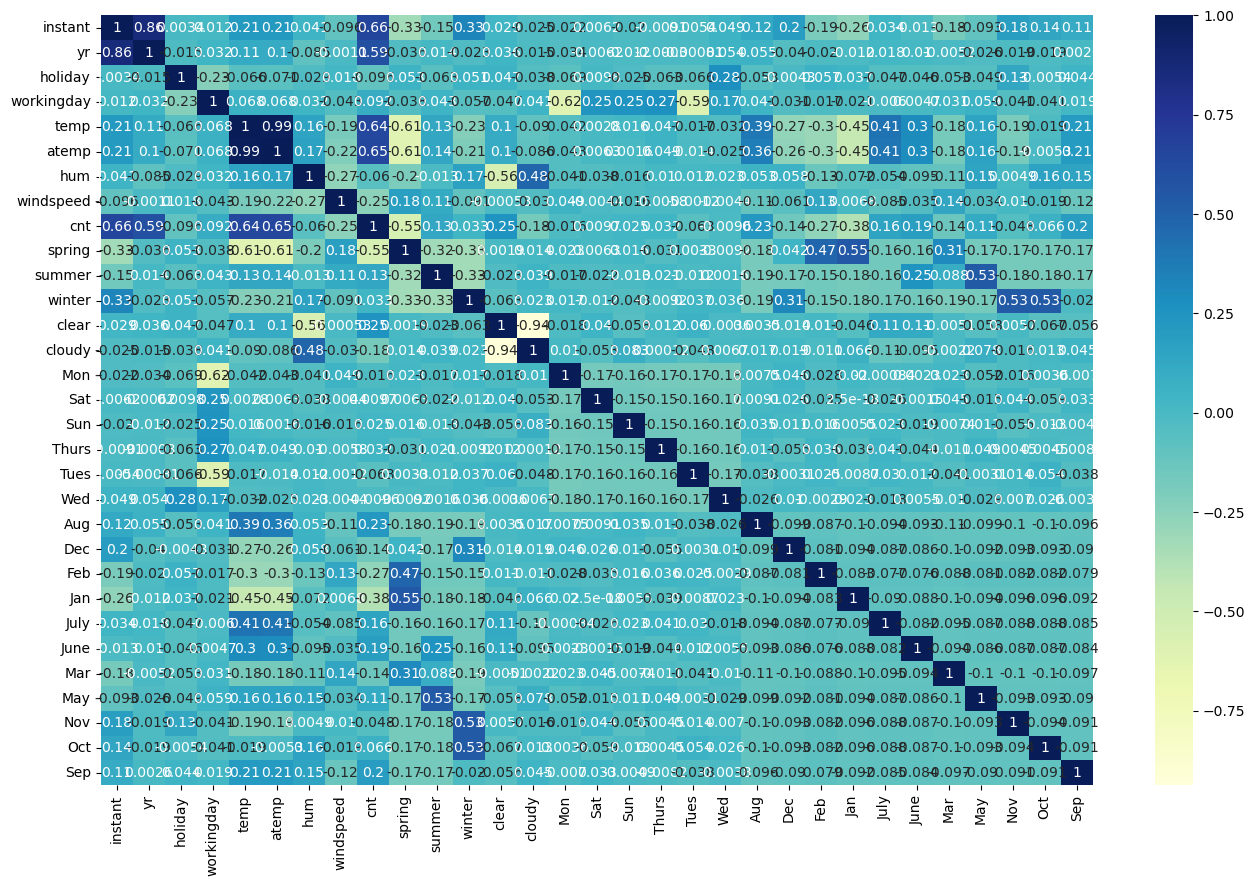

In [468]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

'atemp' seems to the correlated to `cnx` the most. Let's create a pairplot.

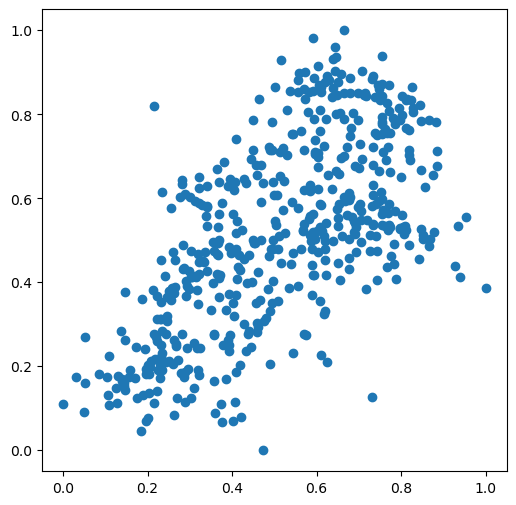

In [469]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [470]:
y_train = df_train.pop('cnt')
X_train = df_train

In [471]:
y_train.shape

(510,)

In [472]:
X_train.shape

(510, 30)

# Step 5: Building a linear model


### Adding all the variables to the model

In [473]:
bikeData.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'clear', 'cloudy',
       'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [474]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params


const         0.048747
instant      -0.102904
yr            0.283838
holiday      -0.041345
workingday    0.045041
temp          0.403050
atemp         0.048463
hum          -0.150985
windspeed    -0.184187
spring       -0.049105
summer        0.038326
winter        0.104790
clear         0.257026
cloudy        0.195668
Mon           0.049837
Sat          -0.004004
Sun           0.005784
Thurs        -0.013553
Tues         -0.004787
Wed          -0.015694
Aug           0.033575
Dec          -0.010566
Feb          -0.040102
Jan          -0.074687
July         -0.026183
June          0.007140
Mar          -0.002717
May           0.028826
Nov          -0.010765
Oct           0.034599
Sep           0.103530
dtype: float64

In [475]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     96.33
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          8.09e-180
Time:                        22:32:32   Log-Likelihood:                 528.08
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     480   BIC:                            -869.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0487      0.056      0.872      0.3

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).
Let us check IVF

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. VIF should ideally be less than 5.

In [476]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [477]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,instant,576.76
1,yr,438.59
3,workingday,213.92
20,Dec,67.81
4,temp,67.22
27,Nov,56.60
5,atemp,56.23
13,Mon,48.96
17,Tues,45.66
28,Oct,44.06


### RFE
Recursive feature elimination - We will first use RFE to eliminate variables

In [478]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [479]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [480]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('clear', True, 1),
 ('cloudy', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 3),
 ('Sun', False, 3),
 ('Thurs', False, 3),
 ('Tues', False, 3),
 ('Wed', False, 3),
 ('Aug', True, 1),
 ('Dec', False, 3),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 3),
 ('June', False, 3),
 ('Mar', False, 3),
 ('May', False, 2),
 ('Nov', False, 3),
 ('Oct', True, 1),
 ('Sep', True, 1)]

In [481]:
col = X_train.columns[rfe.support_]
col

Index(['instant', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'clear', 'cloudy', 'Mon', 'Aug', 'Jan', 'Oct', 'Sep'],
      dtype='object')

In [482]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'spring', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed',
       'Dec', 'Feb', 'July', 'June', 'Mar', 'May', 'Nov'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [483]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [484]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [485]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1298.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):                        0.00
Time:                        22:32:37   Log-Likelihood:                          514.34
No. Observations:                 510   AIC:                                     -998.7
Df Residuals:                     495   BIC:                                     -935.2
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [486]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         510 non-null    int64  
 1   holiday    510 non-null    int64  
 2   temp       510 non-null    float64
 3   hum        510 non-null    float64
 4   windspeed  510 non-null    float64
 5   summer     510 non-null    int64  
 6   winter     510 non-null    int64  
 7   clear      510 non-null    int64  
 8   cloudy     510 non-null    int64  
 9   Mon        510 non-null    int64  
 10  Aug        510 non-null    int64  
 11  Jan        510 non-null    int64  
 12  Oct        510 non-null    int64  
 13  Sep        510 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 59.8 KB


In [487]:
#`instant` is insignificant in presence of other variables and can be dropped
X_train_new = X_train_rfe.drop(['instant'], axis = 1)

In [489]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [490]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [491]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          3.66e-190
Time:                        22:32:39   Log-Likelihood:                 514.27
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     495   BIC:                            -935.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.043      0.220      0.8

In [492]:
# Let us remove insignificant Mon as it is greater than 5%
X_train_new2 = X_train_new.drop(['Mon'], axis = 1)

In [494]:
X_train_lm = sm.add_constant(X_train_new2)

In [495]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [496]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          7.61e-191
Time:                        22:32:42   Log-Likelihood:                 513.11
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     496   BIC:                            -938.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0149      0.043      0.345      0.7

In [497]:
X_train_new2.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'clear', 'cloudy', 'Aug', 'Jan', 'Oct', 'Sep'],
      dtype='object')

In [498]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,19.31
2,temp,13.08
7,clear,11.05
8,cloudy,7.85
4,windspeed,4.15
6,winter,2.68
0,yr,2.07
5,summer,1.96
10,Jan,1.66
11,Oct,1.64


In [499]:
# Let us drop hum as VIF is higher than 5
X_train_new3 = X_train_new2.drop(['hum'], axis = 1)
X_train_lm = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.7
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.12e-187
Time:                        22:32:43   Log-Likelihood:                 502.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     497   BIC:                            -923.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1287      0.031     -4.165      0.0

In [500]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.10
6,clear,9.47
7,cloudy,5.41
3,windspeed,4.08
5,winter,2.35
0,yr,2.07
4,summer,1.93
10,Oct,1.64
8,Aug,1.61
9,Jan,1.54


In [501]:
# Let us drop hum as atemp is higher than 5
X_train_new4 = X_train_new3.drop(['temp'], axis = 1)
X_train_lm = sm.add_constant(X_train_new4)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     114.5
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.14e-128
Time:                        22:32:43   Log-Likelihood:                 360.11
No. Observations:                 510   AIC:                            -696.2
Df Residuals:                     498   BIC:                            -645.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1468      0.036      4.062      0.0

In [502]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,clear,4.83
2,windspeed,4.08
6,cloudy,3.32
4,winter,2.27
0,yr,2.03
3,summer,1.87
9,Oct,1.55
7,Aug,1.36
8,Jan,1.33
10,Sep,1.20


In [503]:
X_train_new4.head()

,yr,holiday,windspeed,summer,winter,clear,cloudy,Aug,Jan,Oct,Sep
653,1,0,0.300794,0,1,1,0,0,0,1,0
576,1,0,0.264686,0,0,1,0,0,0,0,0
426,1,0,0.255342,0,0,0,1,0,0,0,0
728,1,0,0.663106,0,0,1,0,0,0,0,0
482,1,0,0.188475,1,0,0,1,0,0,0,0


# Step 6: Residual Analysis of the train data

In [504]:
y_train_cnt = lm.predict(X_train_lm)

In [505]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

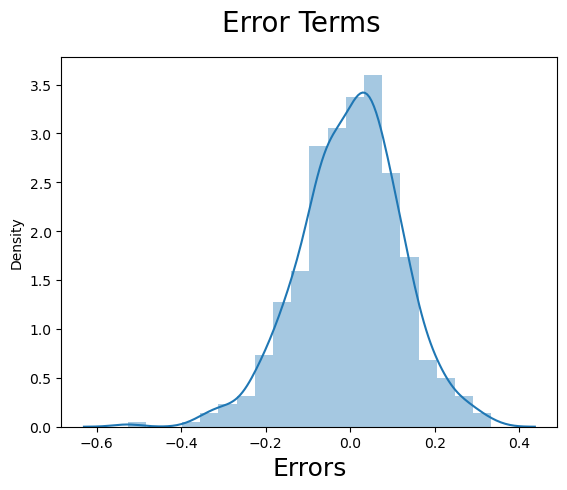

In [506]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 8: Making Predictions using our model

In [507]:
num_vars = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [508]:
y_test = df_test.pop('cnt')
X_test = df_test

In [509]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [510]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

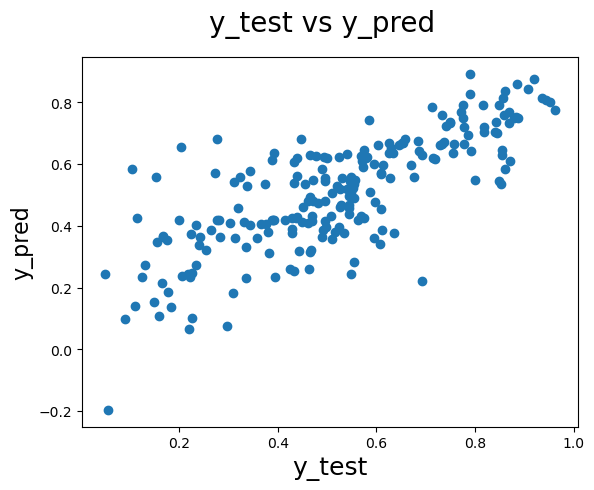

In [511]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ cnt  = yr \times 0.2502 + holiday \times -0.1090 + windspeed \times -0.2611 + summer \times 0.1176 + winter \times 0.0345 + clear \times 0.3084 + cloudy \times 0.2067 + Aug \times 0.1727 + Jan \times -0.2019 + Sep \times 0.2035 $ + 0.1468 


In [513]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5871605226766032